# Introduction to Keras

<img align="center" src="https://github.com/dfbarrero/dataCourse/raw/master/ann/figs/keras.png" width="300">

This notebook is based on the Chapter 10 *Introduction to Artificial Neural Networks with Keras*, Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow. concepts, Tools, and Techiniques to Build Intelligent Systems, by Aurélien Géron. Ed. O'Reilly. 

A more complete notebook based on the same book can be found [here](https://github.com/karthik9001/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow-2nd-Edition/blob/master/10_neural_nets_with_keras.ipynb).

## Importing the library

Keras is a Deep Learning API that can use several backends, i.e., the library that really implements the Deep Learning stuff. Examples of DL libraries are TensorFlow, Microsoft Cognitive Toolkit (CNTK) and Theano. The most popular one is TensorFlow, and actually it has Keras integrated in the library.

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.11.0'

In [6]:
keras.__version__

'2.11.0'

## Loading the dataset

In this example we will use fashion MNIST, which is a widely known image dataset more challenging that MINIST. It contains 70000 greyscale 28x28 images with 10 classes.

In [7]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


We inspect our data in first place.

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
import numpy as np

print(f"Max: {np.max(X_train_full)}")
print(f"Min: {np.min(X_train_full)}")

Max: 255
Min: 0


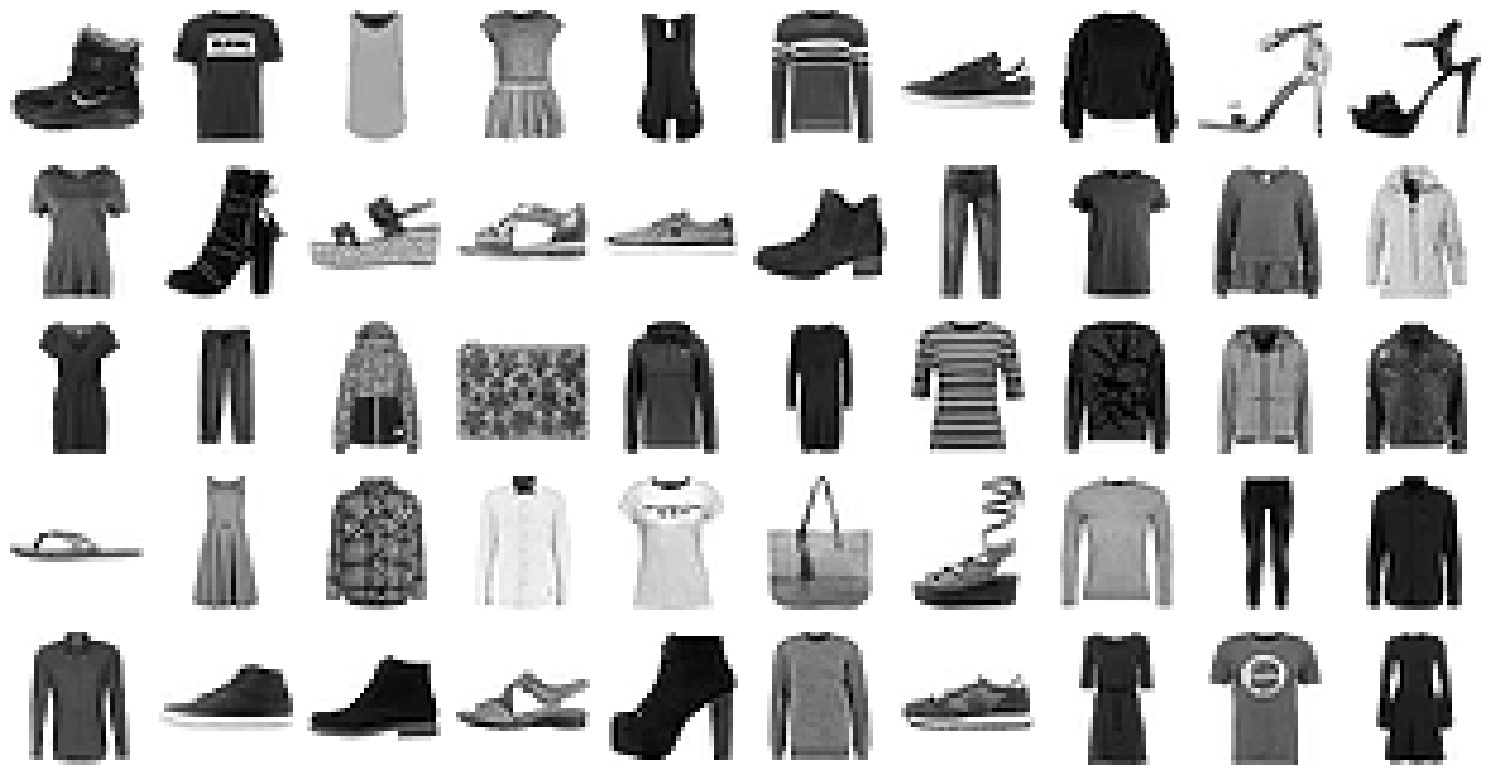

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X_train_full[i].reshape((28,28)),cmap='binary')
    plt.axis("off")
plt.tight_layout()
plt.show()

Normalize and split a validation set.

In [12]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Angle boot"]

class_names[y_train[0]]

'Coat'

# Creating the model using the Sequential API

Keras comes with two APIs:
* Sequential: simple and powerful.
* Functional: more flexible but less simple.

In [14]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2022-12-14 17:18:13.031965: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 17:18:13.052592: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 17:18:13.052775: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 17:18:13.053347: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

Observe:
- *Flatten layer*, with *input_shape*.
- *Dense* layers with relu activation.
- The last layer is *Dense* with 10 neurons and softmax activation.

Model can also be defined with a list.

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


First Dense layer with $235,500 = 784 * 300 + 300$ (bias neurons).

In [17]:
# You need pydot and graphviz to run this

keras.utils.plot_model(model, "my_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [18]:
model.layers

In [19]:
hidden1 = model.layers[1]

hidden1

In [20]:
weights, biases = hidden1.get_weights()

weights

array([[ 0.07077837, -0.00283641,  0.06720532, ...,  0.00469161,
        -0.04056014,  0.01829311],
       [ 0.03221393,  0.06767893,  0.01798223, ...,  0.03763348,
         0.02639063,  0.00417218],
       [ 0.05584747,  0.05281794, -0.0728555 , ...,  0.02196448,
        -0.03511398,  0.07042767],
       ...,
       [-0.04465934,  0.06900389,  0.05876353, ...,  0.06336838,
        -0.06554438, -0.02707247],
       [ 0.01439762, -0.03031217,  0.04236083, ...,  0.03631302,
         0.05881394,  0.02963777],
       [ 0.07124932, -0.02704971,  0.05769567, ..., -0.06873634,
         0.04904582, -0.06828022]], dtype=float32)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Compiling the model

In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Observe:
- "sparse_categorical_crossentropy" loss function because labels are sparce, i.e., indices.
- "sgd" optimizer.
- "accuracy" metric.

In [23]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [24]:
keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Training and evaluating the model

And here we go!

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2022-12-14 17:19:26.777307: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-12-14 17:19:26.810181: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1d469e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-14 17:19:26.810195: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2022-12-14 17:19:26.940135: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.7198 - accuracy: 0.7586 - val_loss: 0.5828 - val_accuracy: 0.7842
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4882 - accuracy: 0.8302 - val_loss: 0.4474 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4440 - accuracy: 0.8449 - val_loss: 0.4136 - val_accuracy: 0.8626
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4162 - accuracy: 0.8540 - val_loss: 0.4133 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3959 - accuracy: 0.8604 - val_loss: 0.3837 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3811 - accuracy: 0.8665 - val_loss: 0.3898 - val_accuracy: 0.8620
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3670 - accuracy: 0.8712 - val_loss: 0.3704 - val_accuracy: 0.8706
Epo

Alternatively:

In [26]:
# history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

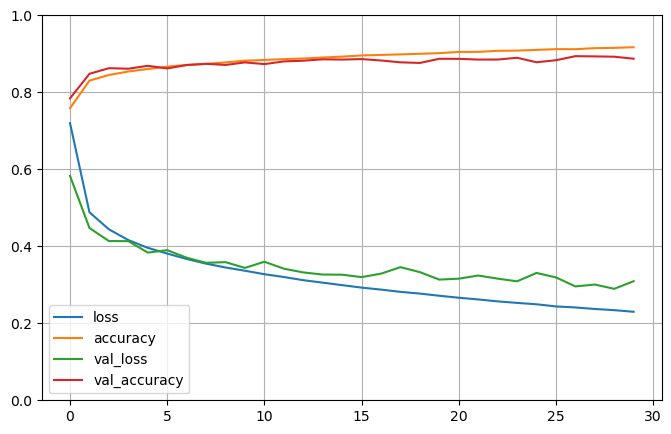

In [27]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

We finally evaluate the model.

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 844us/step - loss: 0.3455 - accuracy: 0.8778


[0.34552648663520813, 0.8777999877929688]

## Using the model to make predictions

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 38ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.06, 0.  , 0.93],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
predict_x=model.predict(X_new) 
y_pred =np.argmax(predict_x, axis=1)

y_pred

1/1 [==============================] - 0s 11ms/step


array([9, 2, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Angle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [39]:
X_new[:,3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.4       , 1.        , 0.90588235, 0.89411765, 0.89019608,
        0.89411765, 0.91372549, 0.90196078, 0.90196078, 0.89803922,
        0.89411765, 0.90980392, 0.90980392, 0.90588235, 0.89019608,
        0.87843137, 0.98823529, 0.70196078, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.92156863, 0.90588235, 0.91372549, 0.88627451,
        0.88235294, 0.8980

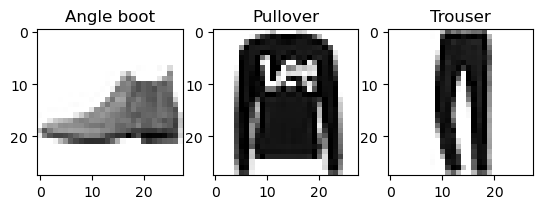

In [40]:
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_new[i].reshape((28,28)),cmap='binary')
    plt.title(class_names[y_pred[i]])

## Regression with Sequential API

In [47]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
housing = fetch_california_housing()

In [53]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

Standarize.

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [55]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [56]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [57]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7382 - val_loss: 2.8659
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3813 - val_loss: 0.8254
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5059 - val_loss: 0.4566
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4412 - val_loss: 0.4302
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4046 - val_loss: 0.4248
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4017 - val_loss: 0.4140
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3903 - val_loss: 0.4104
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3777 - val_loss: 0.4060
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3720 - val_loss: 0.3976
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3658 - val_loss: 0.3987

In [59]:
mse_test = model.evaluate(X_test, y_test)

mse_test

162/162 [==============================] - 0s 479us/step - loss: 0.3414


0.34135323762893677

In [62]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

y_pred

1/1 [==============================] - 0s 10ms/step


array([[1.0068436 ],
       [0.62224364],
       [2.0187678 ]], dtype=float32)

## Saving and restoring

In [41]:
model.save("my_model.h5")

In [42]:
anothermodel = keras.models.load_model("my_model.h5")

In [43]:
anothermodel.predict(X_new[:1])

1/1 [==============================] - 0s 26ms/step


array([[1.3958093e-05, 3.6013796e-07, 1.2022042e-05, 5.6356629e-07,
        8.3547616e-07, 1.1620520e-02, 3.0096080e-05, 5.7869151e-02,
        2.8582674e-04, 9.3016660e-01]], dtype=float32)

## Using callbacks

In [65]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model_checkpoint.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3388 - val_loss: 0.3730
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3377 - val_loss: 0.3675
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3353 - val_loss: 0.3676
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3340 - val_loss: 0.3665
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3334 - val_loss: 0.3654
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3320 - val_loss: 0.3650
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3306 - val_loss: 0.3617
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3317 - val_loss: 0.3613
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3287 - val_loss: 0.3605
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3398 - val_loss: 0.3630

In [66]:
model = keras.models.load_model("my_model_checkpoint.h5")

Early stopping.

In [67]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3285 - val_loss: 0.3611
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3263 - val_loss: 0.3602
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3258 - val_loss: 0.3650
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3253 - val_loss: 0.3612
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3239 - val_loss: 0.3560
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3233 - val_loss: 0.3588
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3236 - val_loss: 0.3556
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3219 - val_loss: 0.3598
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3328 - val_loss: 0.3604
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3221 - val_lo

## Fine-Tuning hyperparameters

In [83]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activatoin="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

In [92]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model) # Deprecated

# scikeras should be used instead of keras.wrappers.scikit_learn.KerasRegressor
# from scikeras.wrappers import KerasClassifier, KerasRegressor 

/home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [93]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

In [94]:
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 2.9648 - val_loss: 1.6973
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 3.3684 - val_loss: 3.3143
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6717 - val_loss: 2.5054
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 7.0723 - val_loss: 7.7960
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 2.8391 - val_loss: 13.7060
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 39.8642 - val_loss: 56.7629
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 3.9170 - val_loss: 214.8645
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 721.4573 - val_loss: 892.3691
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 69.4606 - val_loss: 4686.2407
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 18

/home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
27 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "/tmp/ipykernel_5285/1070398292.py", line 5, in build_model
    model.add(keras.

363/363 [==============================] - 1s 2ms/step - loss: 3.5557 - val_loss: 5.0567
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7033 - val_loss: 8.6828
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 20.6477 - val_loss: 24.9571
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 54.2020 - val_loss: 74.3954
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 177.1187 - val_loss: 238.6773
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 374.8270 - val_loss: 638.4384
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 1021.9598 - val_loss: 72023.4844
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 11311.6260 - val_loss: 234811.5156
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 9850.9229 - val_loss: 801950.5625
Epoch 10/100
363/363 [==============================] - 1s 1ms/step

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f5c5c6ae2d0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5c5c6aedd0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [95]:
rnd_search_cv.best_params_

{'learning_rate': 0.014556882187920332, 'n_hidden': 0, 'n_neurons': 17}